In [243]:
import pandas as pd
import numpy as np
from jupyter_client.adapter import code_to_line
%matplotlib inline
import matplotlib.pyplot as plt
import  seaborn as  sns
sns.set(rc={'figure.figsize': (9, 6)})


In [244]:
bdir = 'C:\\Users\\al\\ExtDrive\\PhysicsStorage\\insomania\\datascience\\stepic\\ML contest\\'
events_data = pd.read_csv(bdir + 'event_data_train.zip',
                          compression='zip')
submission_data = pd.read_csv(bdir + 'submissions_data_train.zip',
                              compression='zip')

In [245]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [246]:
events_data['date'] = pd.to_datetime(events_data.timestamp, unit='s')

In [247]:
events_data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3480703 entries, 0 to 3480702
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   step_id    3480703 non-null  int64         
 1   timestamp  3480703 non-null  int64         
 2   action     3480703 non-null  object        
 3   user_id    3480703 non-null  int64         
 4   date       3480703 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 132.8+ MB


In [248]:
events_data['day'] = events_data.date.dt.date

<AxesSubplot:xlabel='day'>

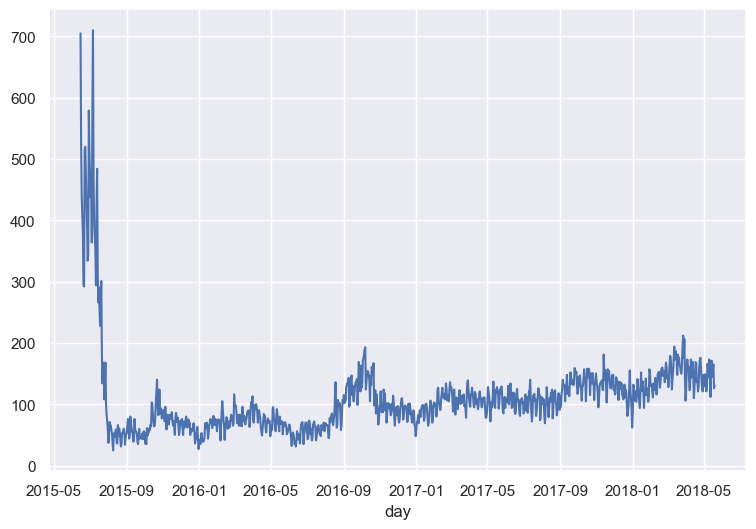

In [249]:
events_data.groupby('day') \
    .user_id.nunique().plot()

In [250]:
# events_data[events_data.action == 'passed']\
#     .groupby('user_id',as_index=False) \
#     .agg({'step_id': 'count'}) \
#     .rename(columns={'step_id':'passed_steps'})\
#     ['passed_steps'].hist()

In [251]:
user_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id',
                        aggfunc='count',
                        fill_value=0).reset_index()

array([[<AxesSubplot:title={'center':'passed'}>,
        <AxesSubplot:title={'center':'discovered'}>]], dtype=object)

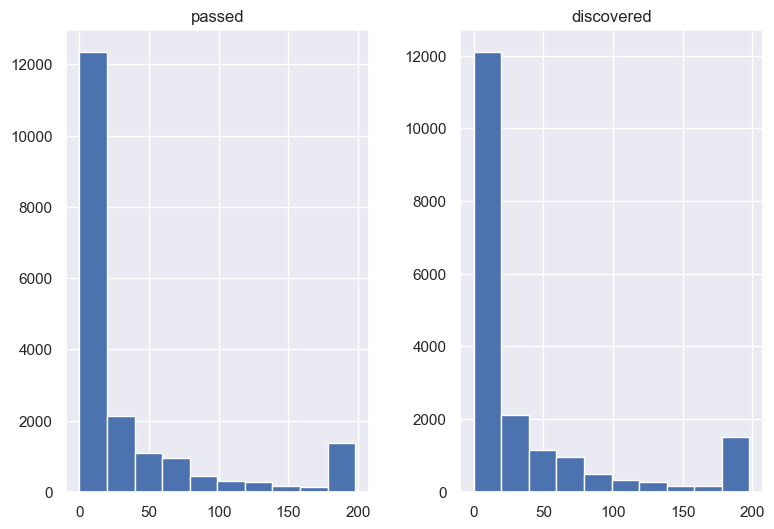

In [252]:
user_events_data[['passed','discovered']].hist()

In [298]:
submission_data['date'] = pd.to_datetime(submission_data.timestamp, unit='s')
submission_data['day'] = submission_data.date.dt.date

In [300]:
submission_data

,step_id,timestamp,submission_status,user_id,user_min_timestamp,date,day
0,31971,1434349275,correct,15853,1434346056,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,1434346056,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,1434346056,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,1434346056,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,1434346056,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,1501946959,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,1503059927,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,1506348153,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,1523035316,2018-04-06 17:21:56,2018-04-06


In [301]:
user_scores = submission_data.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0).reset_index()

In [302]:
gap_data = events_data[['user_id','day','timestamp']] \
    .drop_duplicates(subset=['user_id','day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [303]:
gap_data = pd.Series(np.concatenate(gap_data, axis=0))/(24*60*60)

In [304]:
gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<AxesSubplot:>

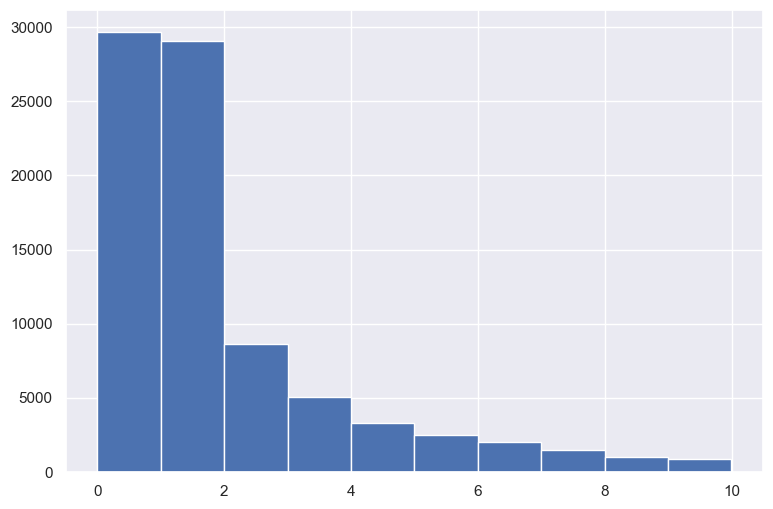

In [305]:
gap_data[gap_data < 10].hist()

In [306]:
gap_data.quantile(0.90)

18.325995370370403

In [307]:
submission_data[submission_data.submission_status == 'correct'].sort_values('date')

,step_id,timestamp,submission_status,user_id,user_min_timestamp,date,day
37939,32929,1434340944,correct,17632,1434340944,2015-06-15 04:02:24,2015-06-15
37938,32812,1434341039,correct,17632,1434340944,2015-06-15 04:03:59,2015-06-15
39970,32929,1434342105,correct,442,1434342105,2015-06-15 04:21:45,2015-06-15
39969,32812,1434342156,correct,442,1434342105,2015-06-15 04:22:36,2015-06-15
3701,32929,1434342390,correct,22254,1434342390,2015-06-15 04:26:30,2015-06-15
...,...,...,...,...,...,...,...
484798,31981,1526769714,correct,19410,1525002126,2018-05-19 22:41:54,2018-05-19
484804,31988,1526769991,correct,19410,1525002126,2018-05-19 22:46:31,2018-05-19
484803,31986,1526770164,correct,19410,1525002126,2018-05-19 22:49:24,2018-05-19
484812,32089,1526770204,correct,19410,1525002126,2018-05-19 22:50:04,2018-05-19


In [308]:
submission_data[['user_id','day']]\
    .groupby('user_id') \
    .nunique() \
    .sort_values('day',ascending=False)
new_df = submission_data.pivot_table(index='user_id',
                         columns='submission_status',
                         values='step_id',
                                     aggfunc='count')
new_df

submission_status,correct,wrong
user_id,,
2,2.0,NaN
3,29.0,23.0
5,2.0,2.0
8,9.0,21.0
14,NaN,1.0
...,...,...
26787,3.0,NaN
26790,1.0,NaN
26794,33.0,9.0


In [309]:
ak = events_data[events_data.action == 'passed'] \
    .groupby('user_id') \
    .agg({'action':'count'}) \
    .sort_values(['action'], ascending=[False])
ak[ak.action==198]\
    .sort_index()

,action
user_id,
22,198
30,198
39,198
80,198
149,198
...,...
26270,198
26304,198
26610,198


In [310]:
events_data \
    .groupby('user_id') \
    .agg({'action':'count'}) \
    .sort_values('action',ascending=False)

,action
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905
...,...
19546,2
1,2
11437,1


In [311]:
user_scores.sort_values('correct',ascending=False)

submission_status,user_id,correct,wrong
439,1046,421,513
2099,5552,186,93
6415,17135,168,177
2344,6183,142,65
3208,8461,135,42
...,...,...,...
551,1321,0,2
9778,26349,0,1
3559,9422,0,1
5014,13408,0,2


In [312]:
events_data.tail()

,step_id,timestamp,action,user_id,date,day,min_timestamp,time_from_start
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0
3480702,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0


In [313]:
now = 1526772811
drop_out_threshold = 20*24*60*60


users_data = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}) \
    .rename(columns={'timestamp':'last_timestamp'})
users_data['is_gone_user'] = (now - users_data.last_timestamp) > drop_out_threshold

In [314]:
users_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [315]:
user_scores.head()

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1


In [316]:
users_data = users_data.merge(user_scores, on='user_id', how='outer')
users_data = users_data.fillna(0)
users_data = users_data.merge(user_events_data, how='outer')

In [317]:
users_days = events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [318]:
# users_data = users_data.merge(users_days, how='outer')

In [319]:
users_data['passed_corse'] = users_data.passed > 170

In [320]:
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed
passed_corse,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [321]:
users_data

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,passed_corse
0,1,1472827464,True,0.0,0.0,1,0,0,1,False
1,2,1519226966,True,2.0,0.0,9,9,2,10,False
2,3,1444581588,True,29.0,23.0,91,87,30,192,False
3,5,1499859939,True,2.0,2.0,11,11,4,12,False
4,7,1521634660,True,0.0,0.0,1,1,0,1,False
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9,False
19230,26793,1510225034,True,0.0,0.0,1,0,1,1,False
19231,26794,1512035039,True,33.0,9.0,69,69,34,180,False
19232,26797,1509995096,True,2.0,0.0,10,10,2,13,False


In [322]:
user_min_time = events_data.groupby('user_id', as_index=False) \
    .agg({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)
user_min_time

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660
...,...,...
19229,26790,1451484016
19230,26793,1510225031
19231,26794,1495287049
19232,26797,1508425316


In [323]:
users_data = users_data.merge(user_min_time, how='outer')

In [324]:
events_data_train = pd.DataFrame()

In [325]:
# for user_id in users_data.user_id:
#     min_user_time = users_data[users_data.user_id == user_id].min_timestamp.item()
#     time_threshold = min_user_time + 3 * 24 * 60 * 60
#     user_events_data = events_data[(events_data.user_id == user_id) & (events_data.timestamp < time_threshold)]
#
#     events_data_train = events_data_train.append(user_events_data)
#     break

In [326]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,False,1521634660


In [327]:
events_data

,step_id,timestamp,action,user_id,date,day,min_timestamp,time_from_start
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848,47
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848,47
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0


In [328]:
# events_data_my = events_data.__deepcopy__()

In [329]:
events_data = events_data.merge(user_min_time,how='outer')
events_data['time_from_start'] = events_data.timestamp - events_data.min_timestamp

In [330]:
learning_time_threshold = 3 * 24 * 60 * 60

events_data_train = events_data[events_data.time_from_start <= learning_time_threshold]

In [331]:
res = events_data.groupby(['user_id'],as_index=False)[['user_id','action','step_id']].tail()
# last_event = res[res.action == 'started_attempt']
# last_event.groupby('step_id',as_index=False).count()
res

,user_id,action,step_id
904,17632,viewed,31977
905,17632,viewed,31976
906,17632,viewed,31972
907,17632,viewed,31971
908,17632,viewed,31978
...,...,...,...
3480698,943,discovered,32814
3480699,943,passed,32814
3480700,5198,viewed,32815
3480701,5198,discovered,32815


In [332]:
submission_data[submission_data.submission_status=='wrong'].groupby('step_id',as_index=False)\
    .count() \
    .sort_values(by='submission_status')\
    .tail()

,step_id,timestamp,submission_status,user_id,user_min_timestamp,date,day
12,32075,10003,10003,10003,10003,10003,10003
44,33481,10300,10300,10300,10300,10300,10300
19,32202,13002,13002,13002,13002,13002,13002
11,32031,13373,13373,13373,13373,13373,13373
4,31978,16084,16084,16084,16084,16084,16084


In [333]:
submission_data.sort_values(['user_id', 'timestamp'], ascending=False).drop_duplicates(['user_id']) \
    .query("submission_status == 'wrong'").groupby('step_id') \
    .count().sort_values('submission_status').tail(1)

,timestamp,submission_status,user_id,user_min_timestamp,date,day
step_id,,,,,,
31978,154,154,154,154,154,154


In [334]:
events_data_train.groupby('user_id').day.nunique().max()

4

In [335]:
submission_data

,step_id,timestamp,submission_status,user_id,user_min_timestamp,date,day
0,31971,1434349275,correct,15853,1434346056,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,1434346056,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,1434346056,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,1434346056,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,1434346056,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,1501946959,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,1503059927,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,1506348153,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,1523035316,2018-04-06 17:21:56,2018-04-06


In [336]:
users_min_submission = submission_data.sort_values(['user_id', 'timestamp'], ascending=True) \
    .drop_duplicates(['user_id'])[['user_id','timestamp']] \
    .rename(columns={'timestamp':'user_min_timestamp'})
submission_data = submission_data.merge(users_min_submission,how='outer')
submission_data_train = submission_data[submission_data.timestamp - submission_data.user_min_timestamp <= learning_time_threshold]

In [337]:
submission_data_train.groupby('user_id').day.nunique().max()

4

In [338]:
submission_data_train.head()

,step_id,timestamp,submission_status,user_id,user_min_timestamp,date,day
0,31971,1434349275,correct,15853,1434346056,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,1434346056,2015-06-15 06:05:00,2015-06-15
4,31976,1434348123,wrong,15853,1434346056,2015-06-15 06:02:03,2015-06-15
5,31976,1434348188,correct,15853,1434346056,2015-06-15 06:03:08,2015-06-15
7,31977,1434347371,correct,15853,1434346056,2015-06-15 05:49:31,2015-06-15


In [339]:
events_data_train

,step_id,timestamp,action,user_id,date,day,min_timestamp,time_from_start
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15,1434340848,0
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15,1434340848,47
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15,1434340848,47
...,...,...,...,...,...,...,...,...
3480698,32814,1526762783,discovered,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480699,32814,1526762783,passed,943,2018-05-19 20:46:23,2018-05-19,1526762664,119
3480700,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0
3480701,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19,1526772750,0


In [340]:
users_data.head()

,user_id,last_timestamp,is_gone_user,correct,wrong,discovered,passed,started_attempt,viewed,passed_corse,min_timestamp
0,1,1472827464,True,0.0,0.0,1,0,0,1,False,1472827464
1,2,1519226966,True,2.0,0.0,9,9,2,10,False,1514383364
2,3,1444581588,True,29.0,23.0,91,87,30,192,False,1434358476
3,5,1499859939,True,2.0,2.0,11,11,4,12,False,1466156809
4,7,1521634660,True,0.0,0.0,1,1,0,1,False,1521634660


In [341]:
X = submission_data_train.groupby('user_id').day.nunique().to_frame()\
    .reset_index()\
    .rename(columns={'day':'days'})

In [342]:
steps_tried = submission_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index() \
    .rename(columns={'step_id':'steps_tried'})

In [343]:
X = X.merge(steps_tried, on='user_id',how='outer')

In [344]:
X

,user_id,days,steps_tried
0,2,1,2
1,3,1,4
2,5,1,2
3,8,1,11
4,14,1,1
...,...,...,...
9935,26787,1,3
9936,26790,1,1
9937,26794,3,27
9938,26797,1,2


In [345]:
X = X.merge(submission_data_train.pivot_table(
    index='user_id',
    columns='submission_status',
    values='step_id',
    aggfunc='count',
    fill_value=0).reset_index())

In [346]:
X['correct_ratio'] = X.correct / (X.correct + X.wrong)

In [347]:
X = X.merge(events_data_train.pivot_table(index='user_id',
                                           columns='action',
                                           values='step_id',
                                           aggfunc='count',
                                           fill_value=0).reset_index()[['user_id','viewed']], how='outer')

In [348]:
X = X.fillna(0)

In [349]:
X = X.merge(users_data[['user_id','passed_corse','is_gone_user']], how='outer')

In [350]:
X = X[~((X.is_gone_user == False) & (X.passed_corse == False))]

In [351]:
X = X.set_index('user_id')

In [352]:
y = X.passed_corse.map(int)

In [353]:
X = X.drop(['passed_corse','is_gone_user'],axis=1)

In [354]:
y

user_id
2        0
3        0
5        0
8        0
14       0
        ..
26773    0
26774    0
26788    0
26789    0
26793    0
Name: passed_corse, Length: 18288, dtype: int64

In [355]:
X

,days,steps_tried,correct,wrong,correct_ratio,viewed
user_id,,,,,,
2,1.0,2.0,2.0,0.0,1.0,9
3,1.0,4.0,4.0,4.0,0.5,20
5,1.0,2.0,2.0,2.0,0.5,1
8,1.0,11.0,9.0,21.0,0.3,154
14,1.0,1.0,0.0,1.0,0.0,9
...,...,...,...,...,...,...
26773,0.0,0.0,0.0,0.0,0.0,1
26774,0.0,0.0,0.0,0.0,0.0,1
26788,0.0,0.0,0.0,0.0,0.0,1


In [364]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [365]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 10),
             # 'min_samples_split': range(2, 10),
             # 'min_samples_leaf': range(1, 10)
             }

clf = DecisionTreeClassifier()
search = GridSearchCV(clf, parametrs, cv=5)

In [366]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [367]:
search.fit(X_train, y_train)
best_tree = search.best_estimator_

In [368]:
print(search.best_params_)
print(best_tree.score(X_train,y_train))
print(best_tree.score(X_test,y_test))

{'criterion': 'entropy', 'max_depth': 5}
0.9278485145282402
0.9252816434724983


In [369]:
from sklearn.metrics import precision_score
from sklearn import metrics


predictions = best_tree.predict(X_test)
precision_score_value = precision_score(predictions,y_test,average='micro')
print(precision_score_value)
print(metrics.f1_score(y_test,predictions))
fpr, tpr, thresholds =  metrics.roc_curve(y_test, predictions, pos_label=2)
print(metrics.auc(fpr, tpr))

0.9252816434724983
0.16635859519408502
nan


C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_ranking.py:1018: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [370]:
import os
os.environ["PATH"] += os.pathsep + 'C:\\Program Files\\Graphviz\\bin\\'
from IPython.display import SVG
from graphviz import Source
from IPython.display import display
from IPython.display import HTML
from sklearn import tree

style = "<style>svg{width:100% !important;height:100% !important;}</style>"
HTML(style)

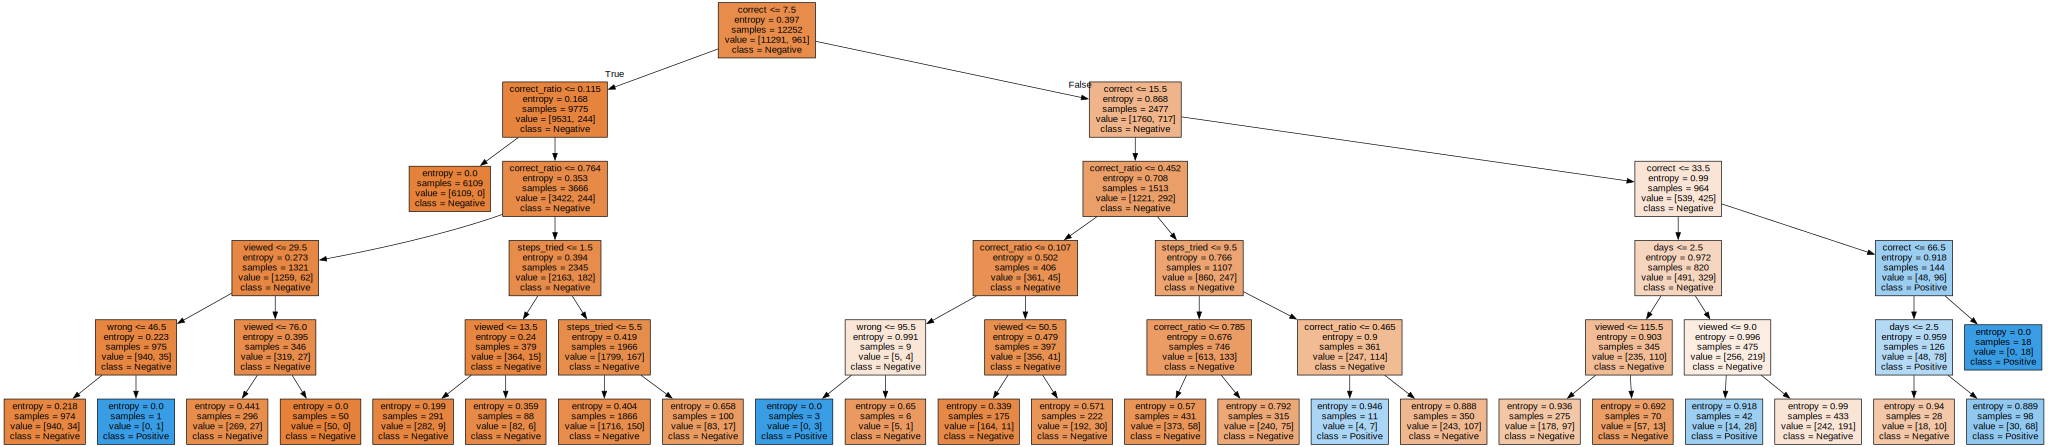

In [371]:

graph = Source(tree.export_graphviz(best_tree, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

In [372]:
from sklearn import metrics

def all_metrics(model, X_test, y_test):
    observations = y_test
    prediction = model.predict(X_test)

    true_positive = np.logical_and(prediction, observations)
    false_positive = np.logical_and(prediction, np.logical_not(observations))
    true_negative = np.logical_and(np.logical_not(prediction), np.logical_not(observations))
    false_negative = np.logical_and(np.logical_not(prediction), observations)

    tp, fp, tn, fn = (x.sum() for x in (true_positive, false_positive, true_negative, false_negative))
    accuracy = (tp + tn) / (tp + fp + fn + tn)
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (recall * precision) / (recall + precision)

    print('True Positive: ', tp)
    print('False Positive: ', fp)
    print('True Negative: ', tn)
    print('False Negative: ', fn)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('Recall: ', recall)
    print('F1 score: ', f1_score)

    metrics.plot_roc_curve(model, X_test, y_test)
    metrics.plot_precision_recall_curve(model, X_test, y_test)
    metrics.plot_confusion_matrix(model, X_test, y_test)

True Positive:  45
False Positive:  32
True Negative:  5540
False Negative:  419
Accuracy:  0.9252816434724983
Precision:  0.5844155844155844
Recall:  0.09698275862068965
F1 score:  0.16635859519408502


C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\al\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is depreca

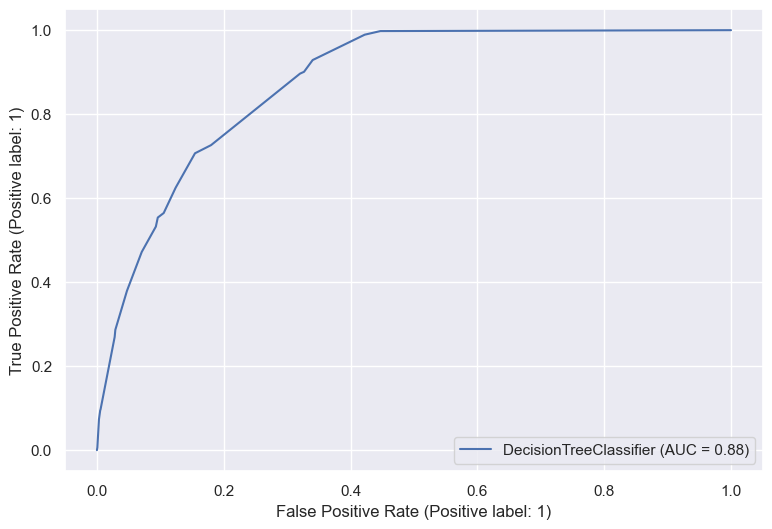

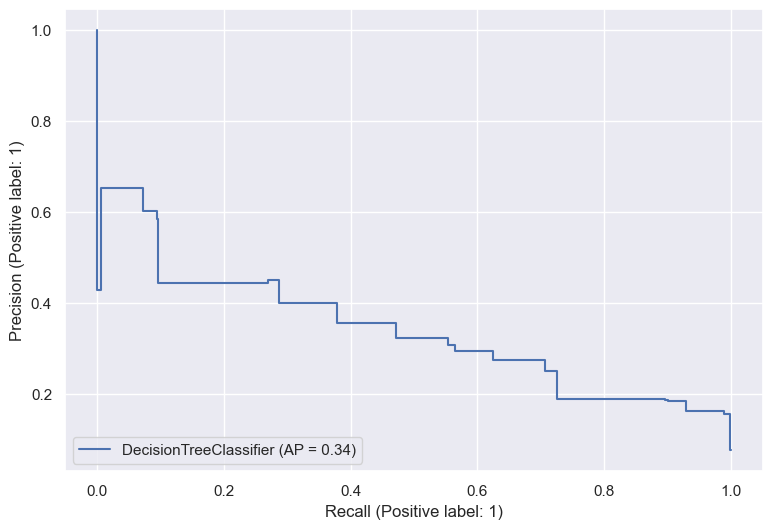

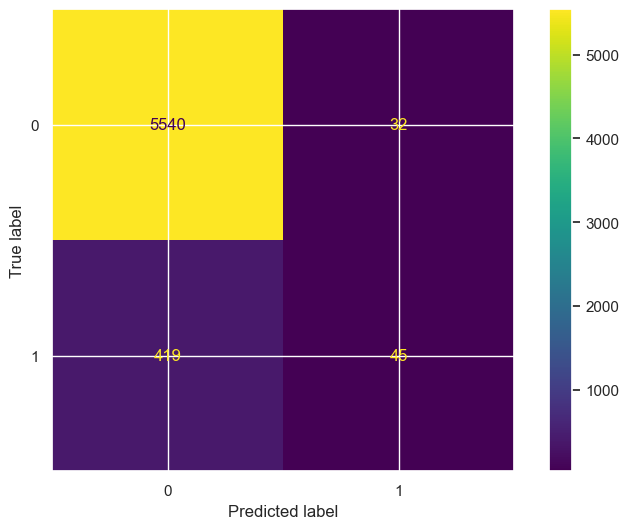

In [373]:
all_metrics(best_tree, X_test, y_test)